# **<span style="color: red;">REGRESSION TASK</span>**

# 1. Violent Crime Rate California 2000-2013
---
***(https://catalog.data.gov/dataset/violent-crime-rate-94cb9)***

## 1.1 Importing Libraries
---
Mandatory for starting the regression task.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 1.2 Printing CSV file
---
Printing the .csv file to check for errors.
To begin cleaning data to fix errors, the column names should be known. 

In [2]:
cali_cr = pd.read_csv("/kaggle/input/california-crimerate/violent-crime-rate-california-2000-2013.csv")
print(cali_cr)
cali_cr.columns

             ind_id                                 ind_definition  \
0               752  Number of Violent Crimes per 1,000 Population   
1               752  Number of Violent Crimes per 1,000 Population   
2               752  Number of Violent Crimes per 1,000 Population   
3               752  Number of Violent Crimes per 1,000 Population   
4               752  Number of Violent Crimes per 1,000 Population   
...             ...                                            ...   
49222           752  Number of Violent Crimes per 1,000 Population   
49223           752  Number of Violent Crimes per 1,000 Population   
49224           752  Number of Violent Crimes per 1,000 Population   
49225           752  Number of Violent Crimes per 1,000 Population   
49226  END OF TABLE                                            NaN   

       reportyear  race_eth_code race_eth_name geotype  geotypevalue  \
0          2000.0            9.0         Total      CA           6.0   
1          2000

/tmp/ipykernel_13/4142178713.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cali_cr = pd.read_csv("/kaggle/input/california-crimerate/violent-crime-rate-california-2000-2013.csv")
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Index(['ind_id', 'ind_definition', 'reportyear', 'race_eth_code',
       'race_eth_name', 'geotype', 'geotypevalue', 'geoname', 'county_fips',
       'county_name', 'region_code', 'region_name', 'strata_name_code',
       'strata_name', 'strata_level_name_code', 'strata_level_name',
       'numerator', 'denominator', 'rate', 'll_95ci', 'ul_95ci', 'se', 'rse',
       'ca_decile', 'ca_rr', 'dof_population', 'version'],
      dtype='object')

## 1.3 Cleaning
---
Some records are used for formatting text only, which means they aren't useful for data collection. However, we can still reference some of them during the visualization stage in regards to labels. 

In [3]:
droplist = ['ind_id', 'ind_definition', 'race_eth_code', 'race_eth_name', 'geotype', 'geotypevalue', 'county_fips', 'region_code', 'strata_name_code', 'strata_name', 'strata_level_name_code', 'strata_level_name', 'ca_decile', 'ca_rr', 'dof_population', 'version']
cali_cr_clean = cali_cr.dropna(subset=['county_name', 'rate'])
cali_cr_clean = cali_cr_clean[['reportyear', 'county_name', 'numerator', 'denominator', 'rate']]

print(cali_cr_clean)

       reportyear     county_name  numerator  denominator      rate
9          2000.0         Alameda     9503.0    1443741.0  6.582206
14         2000.0          Alpine       10.0       1208.0  8.278146
19         2000.0          Amador      179.0      34120.0  5.246190
24         2000.0           Butte      699.0     203171.0  3.440452
29         2000.0       Calaveras      118.0      40554.0  2.909701
...           ...             ...        ...          ...       ...
49131      2013.0          Orange       30.0      67492.0  0.444497
49139      2013.0        Siskiyou       49.0       7639.0  6.414452
49144      2013.0          Sutter      174.0      65133.0  2.671457
49149      2013.0  San Bernardino      107.0      52524.0  2.037164
49154      2013.0  San Bernardino       86.0      21214.0  4.053927

[7113 rows x 5 columns]


In the described data, it seems like the highest rate is at **795** in <u>Vernon City</u>. It raised some flags, so checking the reason was necessary. After a quick search, it was indeed true that the population of residents was low (**93**), but apparently the city itself is just **full of workers** since it's an "**exclusively industrial area**". Similarly, the second highest rate that was another city is called <u>Industry City</u>. We can then assume that they face similar issues of extremely high / skewed population to crime-rate ratios.

## 1.4 Regression Task & Visualization
---
Reported 

### 1.41 Decision Tree Regression
---

In [4]:
# --- County names are strings which cannot be read by the model ---
combined = pd.get_dummies(cali_cr_clean, columns=['county_name'], drop_first=True)

# --- Predicting future trends based on 2000-2010 data ---
train = combined[combined['reportyear'] <= 2010]
test  = combined[combined['reportyear'] > 2010]

# --- 2000-2010 data ---
train_X = train.drop(columns=['rate'])
train_y = train['rate']

# --- 2011-2013 data ---
val_X = test.drop(columns=['rate'])
val_y = test['rate']

# --- Decision Tree Regression Model ---
crimerate_model = DecisionTreeRegressor(random_state=1)
crimerate_model.fit(train_X, train_y)

# --- Making predictions ---
val_predictions = crimerate_model.predict(val_X)

# --- Copying data to test and adding predicted crime rates ---
test = combined[combined['reportyear'] > 2010].copy()
test['predicted_rate'] = val_predictions

print(val_predictions)

[5.94009844 5.84307179 2.5743783  ... 2.65172958 2.1192855  3.99076834]


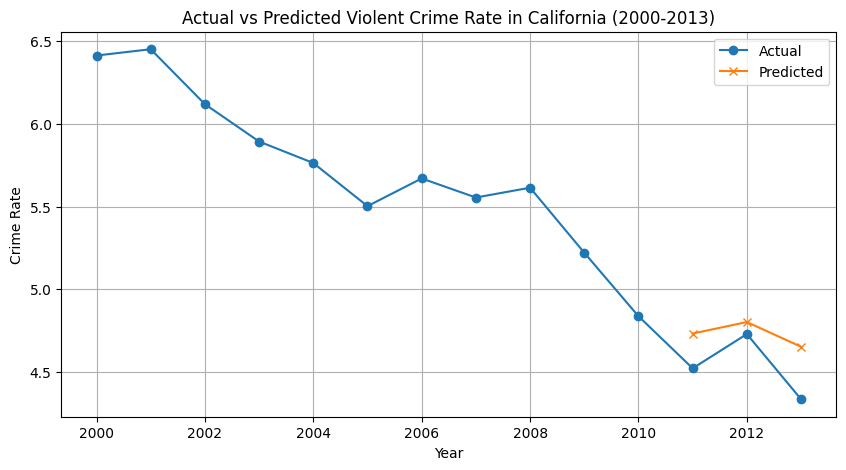

In [5]:
import matplotlib.pyplot as plt

actual_data = cali_cr_clean.groupby('reportyear')['rate'].mean()
predicted_data = test.groupby('reportyear')['predicted_rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(actual_data.index, actual_data.values, marker='o', label='Actual')
plt.plot(predicted_data.index, predicted_data.values, marker='x', label='Predicted')
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.title("Actual vs Predicted Violent Crime Rate in California (2000-2013)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
print(f"Predicted crime rates 2011-2013:\n{val_predictions[0:5]}\n")
print(f"Actual crime rates 2011-2013:\n{val_y.values[0:5]}\n")
print(f"Training data:\n{train_y.head()}")

val_mae = mean_absolute_error(val_y, val_predictions)
print(f"\nMean Absolute Error: {val_mae}")

Predicted crime rates 2011-2013:
[5.94009844 5.84307179 2.5743783  3.03942555 2.78356115]

Actual crime rates 2011-2013:
[7.05812597 5.88730025 2.54287864 2.58776383 2.60224661]

Training data:
9     6.582206
14    8.278146
19    5.246190
24    3.440452
29    2.909701
Name: rate, dtype: float64

Mean Absolute Error: 0.4813252669849279


### 1.42 Model Validation
---
Predicted values are hovering around similar values.

### 1.51 Linear Regression
---
Unsure if this is needed

In [7]:
yearly_trend = cali_cr_clean.groupby('reportyear')['rate'].mean()

x = yearly_trend.index.values.reshape(-1, 1)
y = yearly_trend.values                       

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
print(y_pred)

[6.47559437 6.32137846 6.16716255 6.01294663 5.85873072 5.70451481
 5.5502989  5.39608298 5.24186707 5.08765116 4.93343525 4.77921934
 4.62500342 4.47078751]


### Line Graph

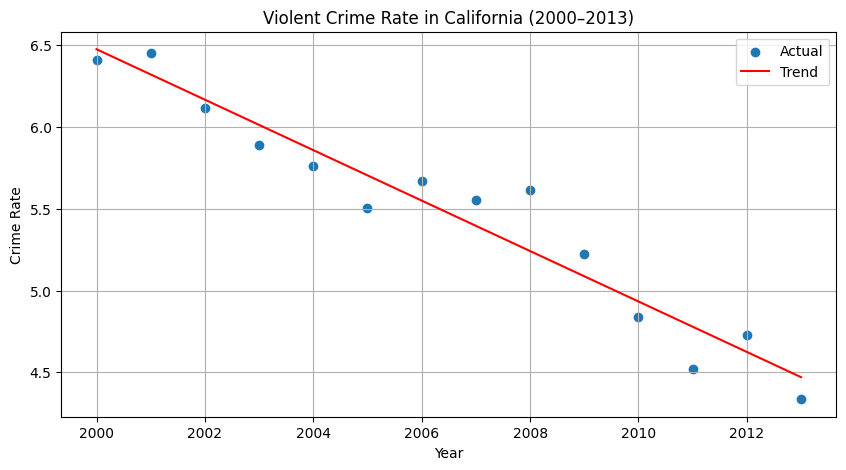

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Actual')
plt.plot(x, y_pred, color='red', label='Trend')
plt.title('Violent Crime Rate in California (2000–2013)')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.grid()
plt.legend()
plt.show()

### 1.52 Heatmap
---
May make things more complicated

---
## 2.1 Dataset Description
This dataset was retrieved from (https://data.chhs.ca.gov/dataset/violent-crime-rate-california-2006-2010).

To better understand what the terms mean in the file, they will be described in this section. Only the remaining columns (not dropped) will be used.

numerator = Number of crimes by type of crime (in this case, the total amount of crimes)
denominator = Total population reported by the FBI

## 2.2 Preprocessing
To better understand


## 2.3 Model Implementation


## 2.4 Results


## 2.5 Interpretation
